useful resource: https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

In [1]:
#code needed to use colab notebook
#if you're using juptyer notebook then skip this line
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

## these modules need to be installed before starting

In [15]:
pip install chart_studio 

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install scattertext

Note: you may need to restart the kernel to use updated packages.


In [17]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [18]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
import chart_studio.plotly as py
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
from collections import Counter
import scattertext as st
import spacy
from pprint import pprint
import en_core_web_sm
#nlp = spacy.load('en_core_web_md')
nlp = en_core_web_sm.load()

Loading BokehJS ...

In [19]:
%cd ~/Documents/GitHub/esade_fake_news/1_Climate_Change/youtube_query/data/nlp
!ls

/Users/Pierre/Documents/GitHub/esade_fake_news/1_Climate_Change/youtube_query/data/nlp
20200507-033205_climate_change_bias.csv
20200507-033205_climate_change_nlp.csv
20200507-033205_climate_change_nlp_subs.csv
notebooks


In [20]:
# load train_cleaned.csv
filename = "20200507-033205_climate_change_nlp_subs.csv"
df = pd.read_csv(filename, index_col=0)

df.head()

Bias_num                                              title  \
0         0  Watch the Latest News Headlines and Live Event...   
1         0  An Inconvenient Border: Where China Meets Nort...   
9         0  Coronavirus: UK lockdown to be eased next week...   
10        0        Lebanon refugee camp (360 video) - BBC News   
11        1  Michio Kaku: The Universe in a Nutshell (Full ...   

                                          description    channel           id  \
0   #coronavirus #covid19 #news #LiveNews #Streami...   ABC News  w_Ma8oQLmSM   
1   Bob Woodruff’s daring 880-mile journey along t...   ABC News  8wRLQ8MVi0Q   
9   The Prime Minister will make a statement on Su...   BBC News  tqp-IfkkoG8   
10  Life can be a struggle if you’re a Syrian refu...   BBC News  AUiqP9t5n8s   
11  Michio Kaku: The Universe in a NutshellWatch t...  Big Think  0NbBjNiw4tk   

                                            subtitles Unnamed: 7 Unnamed: 8  \
0                                                 NaN        NaN        NaN   
1   ["[Music] yeah Irish aqua five bucks North Nor...        NaN        NaN   
9   ["well as we mentioned the Prime Minister will...        NaN        NaN   
10  ["these are Syrian children playing at a derel...        NaN        NaN   
11  ['My name is Professor Michio Kaku. \xa0I\'m a...        NaN        NaN   

   Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
9         NaN         NaN         NaN         NaN         NaN         NaN   
10        NaN         NaN         NaN         NaN         NaN         NaN   
11        NaN         NaN         NaN         NaN         NaN         NaN   

   Unnamed: 15  ... Unnamed: 1008 Unnamed: 1009 Unnamed: 1010 Unnamed: 1011  \
0          NaN  ...           NaN           NaN           NaN           NaN   
1          NaN  ...           NaN           NaN           NaN           NaN   
9          NaN  ...           NaN           NaN           NaN           NaN   
10         NaN  ...           NaN           NaN           NaN           NaN   
11         NaN  ...           NaN           NaN           NaN           NaN   

   Unnamed: 1012 Unnamed: 1013 Unnamed: 1014 Unnamed: 1015 Unnamed: 1016  \
0            NaN           NaN           NaN           NaN           NaN   
1            NaN           NaN           NaN           NaN           NaN   
9            NaN           NaN           NaN           NaN           NaN   
10           NaN           NaN           NaN           NaN           NaN   
11           NaN           NaN           NaN           NaN           NaN   

   Unnamed: 1017 Unnamed: 1018 Unnamed: 1019 Unnamed: 1020 Unnamed: 1021  \
0            NaN           NaN           NaN           NaN           NaN   
1            NaN           NaN           NaN           NaN           NaN   
9            NaN           NaN           NaN           NaN           NaN   
10           NaN           NaN           NaN           NaN           NaN   
11           NaN           NaN           NaN           NaN           NaN   

   Unnamed: 1022  
0            NaN  
1            NaN  
9            NaN  
10           NaN  
11           NaN  

[5 rows x 1022 columns]

## Analysis

In [14]:
#calculate number of characters
df['review_len'] = df['text'].astype(str).apply(len)

#calculate number of words
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df.head()

KeyError: 'text'

(array([   66.,    79.,    66.,    80.,    74.,    73.,    64.,    73.,
           84., 17710.]),
 array([   2. ,  101.8,  201.6,  301.4,  401.2,  501. ,  600.8,  700.6,
         800.4,  900.2, 1000. ]),
 <a list of 10 Patch objects>)

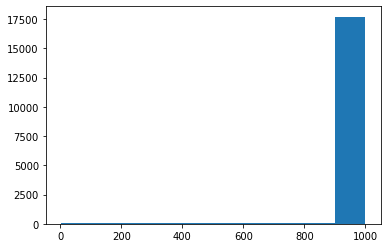

In [8]:
plt.hist(df['review_len'])

(array([9.600e+01, 9.500e+01, 1.020e+02, 1.000e+02, 1.150e+02, 5.540e+02,
        4.141e+03, 1.071e+04, 2.449e+03, 7.000e+00]),
 array([  0. ,  24.6,  49.2,  73.8,  98.4, 123. , 147.6, 172.2, 196.8,
        221.4, 246. ]),
 <a list of 10 Patch objects>)

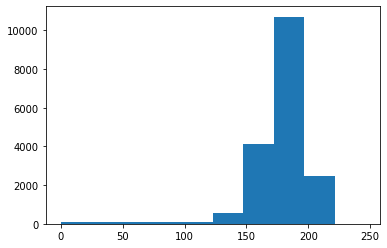

In [9]:
plt.hist(df['word_count'])

In [10]:
x1 = df.loc[df['bias_num'] == 1, 'word_count']
x0 = df.loc[df['bias_num'] == 0, 'word_count']

trace1 = go.Histogram(
    x=x0, name='Right',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'Left',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='Distribution of word count based on bias')
fig = go.Figure(data=data, layout=layout)
fig.show()

In [11]:
x1 = df.loc[df['bias_num'] == 1, 'review_len']
x0 = df.loc[df['bias_num'] == 0, 'review_len']

trace1 = go.Histogram(
    x=x0, name='Right',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'Left',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='Distribution of review_len based on bias')
fig = go.Figure(data=data, layout=layout)
fig.show()

## The distribution of top unigrams before removing stop words

In [12]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['text'], 20)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df1
df1.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')

text   count
0    the  150117
1     to   93258
2   that   79654
3     of   73564
4    you   73378
5     it   55615
6     in   54630
7     is   43265
8     we   38898
9    was   28301
10  they   28076
11  this   26889
12   for   25916
13    so   25626
14    he   25220
15  have   23824
16    on   22455
17  what   21334
18   but   21029
19   are   20149

## The distribution of top unigrams after removing stop words

In [13]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['text'], 20)
df2 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df2
df2.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

text  count
0     know  19512
1   people  14925
2     like  14359
3     just  13198
4    think  11475
5      don   9814
6    right   9329
7       ve   7748
8    going   7692
9     said   7314
10     say   7050
11    time   6656
12    want   6361
13     got   6261
14    yeah   5956
15     did   5637
16  really   5630
17     way   5245
18   gonna   4588
19    look   4394

## The distribution of top bigrams before removing stop words

In [14]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['text'], 20)
df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df3
df3.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review before removing stop words')


text  count
0     of the  13950
1     in the  13297
2   you know  11875
3      to be   6669
4     you re   6631
5     to the   6387
6      we re   6043
7     on the   5660
8   going to   5026
9     it was   4893
10   this is   4804
11   they re   4758
12    if you   4593
13  that the   4256
14   want to   4158
15    at the   3941
16   that we   3763
17   have to   3542
18  that you   3495
19   for the   3494

## The distribution of top bigrams after removing stop words

In [15]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['text'], 20)
df4 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df4
df4.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')

text  count
0          don know   1936
1     united states   1442
2            ve got   1389
3         don think    976
4      donald trump    964
5          don want    826
6        little bit    806
7         make sure    620
8         years ago    615
9        lot people    568
10        joe biden    558
11          ve seen    537
12        know know    490
13        didn know    460
14        just like    433
15  million dollars    381
16      health care    367
17         year old    365
18         know don    363
19        like know    363

## The distribution of Top trigrams before removing stop words

In [16]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['text'], 20)
df5 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df5
df5.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review before removing stop words')

text  count
0          one of the   1820
1   the united states   1265
2         going to be   1112
3         re going to   1047
4         you have to    849
5          be able to    703
6           if you re    692
7          we have to    689
8         in terms of    680
9         you want to    677
10       do you think    675
11        we re gonna    660
12        we re going    658
13        what do you    655
14        some of the    647
15      you know what    644
16       in the world    642
17       you know the    639
18         you re not    625
19       you know you    614

## The distribution of Top trigrams after removing stop words

In [17]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['text'], 20)
df6 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df6
df6.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words')

text  count
0                know don know    144
1   billions billions billions    124
2      president united states    111
3                 don know don     86
4                don know know     84
5               want make sure     79
6      chinese communist party     77
7           corona virus pemic     69
8    world health organization     67
9                  know ve got     66
10             people don know     64
11            thank mr speaker     59
12                let just say     58
13            test track trace     54
14         wall street journal     51
15              long term care     51
16              new york times     47
17          nthe united states     45
18             people don want     44
19               new york city     44

## Finding characteristic terms and their associations

In [20]:
#convert Bias_num to string
df_corpus = df.copy()
df_corpus['Bias_num'] = df_corpus['bias_num'].apply(str)
df_corpus.dtypes

bias_num       int64
text          object
review_len     int64
word_count     int64
Bias_num      object
dtype: object

In [22]:
#Following are the terms that differentiate the review text from a general English corpus.
corpus = st.CorpusFromPandas(df_corpus, category_col='Bias_num', text_col='text', nlp=nlp).build()
print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

['gon', 'trump', 'underst', 'thous', 'biden', 'yeah', 'okay', 'pemic', 'applause', 'coronavirus']


In [23]:
#Following are the terms in review text that are most associated with right wing channels:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Right score'] = corpus.get_scaled_f_scores("1")
pprint(list(term_freq_df.sort_values(by='Right score', ascending=False).index[:20]))

['fucking',
 'fbi',
 'guys',
 'you got',
 'black',
 "here 's",
 'guy',
 "'re gon",
 'quote',
 'i go',
 'i said',
 'this guy',
 'mean i',
 'all right',
 'the left',
 'these guys',
 "'m gon",
 'yeah',
 'i got',
 'hmm']


In [24]:
#Following are the terms in review text that are most associated with left wing channels:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Left score'] = corpus.get_scaled_f_scores("0")
pprint(list(term_freq_df.sort_values(by='Left score', ascending=False).index[:20]))

['applause',
 '♪',
 'narrator',
 'amazon',
 "we\\'re",
 'laughter',
 "we\\'ve",
 "i\\'m",
 "that\\ 's",
 'that\\',
 "don\\'t",
 "it\\ 's",
 'it\\',
 '♪ ♪',
 'he\\',
 'er',
 'canada',
 'and the',
 "he\\ 's",
 'u.s.']
